<a href="https://colab.research.google.com/github/sayak395/Jaynes-Cummings-model/blob/main/Driven_Jaynes_Cummings_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qutip

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from qutip import (basis, destroy, mesolve, qeye, tensor, create, sigmaz, sigmam, sigmap, fock, Qobj, fidelity, Options)
from scipy.signal import find_peaks

# System parameters
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi # cavity-atom coupling

# Hilbert space dimension for the cavity
n_cavity = 10

sigma_z_np = np.array([[1 , 0],
                   [0, -1]])
sigma_z_alt = Qobj(sigma_z_np)

sigma_plus_np = np.array([[0, 1],
                   [0, 0]])

sigma_plus_alt = Qobj(sigma_plus_np)

sigma_minus_np = np.transpose(sigma_plus_np)

sigma_minus_alt = Qobj(sigma_minus_np)

def create_a(n):

    matrix = np.zeros((n, n))

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if j == i - 1:
                matrix[i , j] = np.sqrt(i)

    return Qobj(np.transpose(matrix))


###########################
# Define the Operators
###########################

sigma_minus = tensor(qeye(n_cavity), sigma_minus_alt) # atomic lowering operator
sigma_plus =  tensor(qeye(n_cavity), sigma_plus_alt)  # atomic raising operator
sigma_z = tensor(qeye(n_cavity), sigma_z_alt)     # atomic z operator
a = tensor(create_a(n_cavity), qeye(2))   # cavity annihilation operator
spin_down = fock(2, 1)
spin_up = fock(2, 0)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 74.1 MB/s eta 0:00:00


In [2]:
f = 1.0 * 2 * np.pi # laser-atom coupling
w0 = 1.0 * 2 * np.pi # laser driving frequency

In [3]:
delta_c = wc - w0
delta_a = wa - w0
times = np.arange(0, 50, 1e-5)
tau = wc * times

psi0 = tensor(fock(n_cavity, 3), spin_down)

In [4]:
H_driven_RWA = delta_c * a.dag() * a + 0.5 * delta_a * sigma_z + g * (sigma_plus * a + sigma_minus * a.dag()) + 0.5 * f * (sigma_plus + sigma_minus)

H_driven_RWA = H_driven_RWA/wc

In [5]:
result = mesolve(H_driven_RWA, psi0, tau, c_ops = [], e_ops = [a.dag() * a, sigma_plus * sigma_minus])

KeyboardInterrupt: 

In [ ]:
n_c = result.expect[0]
n_a = result.expect[1]

plt.figure()
plt.plot(tau, n_c, label = 'Cavity')
plt.plot(tau, n_a, label = 'Atom Excited State')
plt.grid(True)
plt.xlabel('Time (arb. units)')
plt.ylabel('Fock state')
plt.legend(loc='best')
plt.show()

In [6]:
times = np.arange(0, 100, 1e-4)
tau = wc * times

In [14]:

psi = tensor(fock(n_cavity, 0), spin_down)

psi_den = psi * psi.dag()

target_state = tensor(fock(n_cavity, 1), spin_down)

target_den = target_state * target_state.dag()

In [8]:
!pip install scikit-optimize

from skopt import gp_minimize
from skopt.space import Real
from skopt.plots import plot_convergence
from skopt.utils import use_named_args


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.3 MB/s eta 0:00:00


In [9]:
# Search space for Bayesian Optimization
space  = [Real(0.0, 25.0 * 2 * np.pi, name='f'),
          Real(0, 100, name='t')]

g = 0.05

# General objective function that accepts named arguments
def objective_general(f, t):
    wc = wa
    w0 = wc
    delta_c = wc - w0
    delta_a = wa - w0
    tau = wc * t
    H = (delta_c * a.dag() * a + 0.5 * delta_a * sigma_z + g * (sigma_plus * a + sigma_minus * a.dag()) + 0.5 * f * (sigma_minus + sigma_plus))
    H /= wc
    result = mesolve(H, psi_den, [0, tau], c_ops=[], e_ops=[], options=Options(store_final_state=True, nsteps = 100000000000, atol = 1e-7, rtol = 1e-7))
    final_rho = result.states[-1]
    fid = fidelity(target_den, final_rho)
    return -fid  # return negative fidelity for minimization

def objective(x):
    return objective_general(x[0], x[1])

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=100, random_state=42, verbose=True, acq_func='EI')

# Best parameters found
print(f"Optimal f: {res.x[0]/(2 * np.pi):.2f}, Optimal t: {res.x[1]:.2f} s")

Iteration No: 1 started. Evaluating function at random point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.5262
Function value obtained: -0.3222
Current minimum: -0.3222
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 15.0467
Function value obtained: -0.4602
Current minimum: -0.4602
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3203
Function value obtained: -0.2364
Current minimum: -0.4602
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.8575
Function value obtained: -0.2582
Current minimum: -0.4602
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.5243
Function value obtained: -0.4299
Current minimum: -0.4602
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. E

/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 3.0934
Function value obtained: -0.3775
Current minimum: -0.4611
Iteration No: 13 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 4.0566
Function value obtained: -0.1548
Current minimum: -0.4611
Iteration No: 14 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 3.4409
Function value obtained: -0.3141
Current minimum: -0.4611
Iteration No: 15 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.3594
Function value obtained: -0.3589
Current minimum: -0.4611
Iteration No: 16 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 1.9508
Function value obtained: -0.0238
Current minimum: -0.4611
Iteration No: 17 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.5496
Function value obtained: -0.4439
Current minimum: -0.4611
Iteration No: 18 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 5.6623
Function value obtained: -0.0717
Current minimum: -0.4611
Iteration No: 19 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.3176
Function value obtained: -0.2647
Current minimum: -0.4611
Iteration No: 20 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.2286
Function value obtained: -0.4167
Current minimum: -0.4611
Iteration No: 21 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.3434
Function value obtained: -0.0000
Current minimum: -0.4611
Iteration No: 22 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.4484
Function value obtained: -0.0926
Current minimum: -0.4611
Iteration No: 23 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.6675
Function value obtained: -0.5434
Current minimum: -0.5434
Iteration No: 24 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 3.3242
Function value obtained: -0.3884
Current minimum: -0.5434
Iteration No: 25 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 2.9615
Function value obtained: -0.4946
Current minimum: -0.5434
Iteration No: 26 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.7135
Function value obtained: -0.2269
Current minimum: -0.5434
Iteration No: 27 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 3.1412
Function value obtained: -0.4146
Current minimum: -0.5434
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.5590
Function value obtained: -0.5276
Current minimum: -0.5434
Iteration No: 29 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 2.8363
Function value obtained: -0.5551
Current minimum: -0.5551
Iteration No: 30 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.3133
Function value obtained: -0.4757
Current minimum: -0.5551
Iteration No: 31 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 3.4379
Function value obtained: -0.3953
Current minimum: -0.5551
Iteration No: 32 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 1.0194
Function value obtained: -0.0968
Current minimum: -0.5551
Iteration No: 33 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.6199
Function value obtained: -0.0768
Current minimum: -0.5551
Iteration No: 34 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 2.6363
Function value obtained: -0.2082
Current minimum: -0.5551
Iteration No: 35 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.2883
Function value obtained: -0.5540
Current minimum: -0.5551
Iteration No: 36 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 2.3170
Function value obtained: -0.1802
Current minimum: -0.5551
Iteration No: 37 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 3.5208
Function value obtained: -0.0270
Current minimum: -0.5551
Iteration No: 38 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.4381
Function value obtained: -0.2465
Current minimum: -0.5551
Iteration No: 39 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 3.4416
Function value obtained: -0.4459
Current minimum: -0.5551
Iteration No: 40 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 2.3404
Function value obtained: -0.3874
Current minimum: -0.5551
Iteration No: 41 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.2731
Function value obtained: -0.2823
Current minimum: -0.5551
Iteration No: 42 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 2.3960
Function value obtained: -0.2584
Current minimum: -0.5551
Iteration No: 43 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.2678
Function value obtained: -0.0000
Current minimum: -0.5551
Iteration No: 44 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.3336
Function value obtained: -0.0627
Current minimum: -0.5551
Iteration No: 45 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 5.6239
Function value obtained: -0.1699
Current minimum: -0.5551
Iteration No: 46 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.5021
Function value obtained: -0.2566
Current minimum: -0.5551
Iteration No: 47 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 2.5027
Function value obtained: -0.0233
Current minimum: -0.5551
Iteration No: 48 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 1.4777
Function value obtained: -0.3248
Current minimum: -0.5551
Iteration No: 49 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 2.6337
Function value obtained: -0.5809
Current minimum: -0.5809
Iteration No: 50 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 2.4834
Function value obtained: -0.4950
Current minimum: -0.5809
Iteration No: 51 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 3.8754
Function value obtained: -0.5175
Current minimum: -0.5809
Iteration No: 52 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 2.6659
Function value obtained: -0.4879
Current minimum: -0.5809
Iteration No: 53 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 2.6784
Function value obtained: -0.5139
Current minimum: -0.5809
Iteration No: 54 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 2.6873
Function value obtained: -0.2262
Current minimum: -0.5809
Iteration No: 55 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 3.3163
Function value obtained: -0.4250
Current minimum: -0.5809
Iteration No: 56 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 2.8676
Function value obtained: -0.4075
Current minimum: -0.5809
Iteration No: 57 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 1.9571
Function value obtained: -0.5720
Current minimum: -0.5809
Iteration No: 58 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 2.0606
Function value obtained: -0.1701
Current minimum: -0.5809
Iteration No: 59 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.3042
Function value obtained: -0.6031
Current minimum: -0.6031
Iteration No: 60 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 0.3051
Function value obtained: -0.5028
Current minimum: -0.6031
Iteration No: 61 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 0.2817
Function value obtained: -0.0001
Current minimum: -0.6031
Iteration No: 62 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 6.6093
Function value obtained: -0.1078
Current minimum: -0.6031
Iteration No: 63 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 0.3341
Function value obtained: -0.5191
Current minimum: -0.6031
Iteration No: 64 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 0.4650
Function value obtained: -0.0931
Current minimum: -0.6031
Iteration No: 65 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 4.3348
Function value obtained: -0.2399
Current minimum: -0.6031
Iteration No: 66 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 0.3598
Function value obtained: -0.5936
Current minimum: -0.6031
Iteration No: 67 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 0.3344
Function value obtained: -0.0226
Current minimum: -0.6031
Iteration No: 68 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 1.9950
Function value obtained: -0.5185
Current minimum: -0.6031
Iteration No: 69 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 3.5783
Function value obtained: -0.5140
Current minimum: -0.6031
Iteration No: 70 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 2.0208
Function value obtained: -0.1818
Current minimum: -0.6031
Iteration No: 71 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 2.8444
Function value obtained: -0.5554
Current minimum: -0.6031
Iteration No: 72 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 2.9278
Function value obtained: -0.3892
Current minimum: -0.6031
Iteration No: 73 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 0.3674
Function value obtained: -0.1419
Current minimum: -0.6031
Iteration No: 74 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 4.7364
Function value obtained: -0.4692
Current minimum: -0.6031
Iteration No: 75 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 3.1656
Function value obtained: -0.1906
Current minimum: -0.6031
Iteration No: 76 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 3.9575
Function value obtained: -0.1180
Current minimum: -0.6031
Iteration No: 77 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 2.3199
Function value obtained: -0.1817
Current minimum: -0.6031
Iteration No: 78 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 5.9092
Function value obtained: -0.0943
Current minimum: -0.6031
Iteration No: 79 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 0.4426
Function value obtained: -0.2076
Current minimum: -0.6031
Iteration No: 80 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 0.3885
Function value obtained: -0.0011
Current minimum: -0.6031
Iteration No: 81 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 2.4410
Function value obtained: -0.2134
Current minimum: -0.6031
Iteration No: 82 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 0.4239
Function value obtained: -0.1695
Current minimum: -0.6031
Iteration No: 83 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 4.5748
Function value obtained: -0.4804
Current minimum: -0.6031
Iteration No: 84 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 3.1032
Function value obtained: -0.2622
Current minimum: -0.6031
Iteration No: 85 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 1.9446
Function value obtained: -0.2007
Current minimum: -0.6031
Iteration No: 86 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 0.4504
Function value obtained: -0.4086
Current minimum: -0.6031
Iteration No: 87 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 4.3572
Function value obtained: -0.3474
Current minimum: -0.6031
Iteration No: 88 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 1.0321
Function value obtained: -0.0106
Current minimum: -0.6031
Iteration No: 89 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 0.4884
Function value obtained: -0.0201
Current minimum: -0.6031
Iteration No: 90 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 3.6710
Function value obtained: -0.4047
Current minimum: -0.6031
Iteration No: 91 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 3.4167
Function value obtained: -0.3956
Current minimum: -0.6031
Iteration No: 92 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 2.5928
Function value obtained: -0.1468
Current minimum: -0.6031
Iteration No: 93 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 5.4783
Function value obtained: -0.2677
Current minimum: -0.6031
Iteration No: 94 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 0.5008
Function value obtained: -0.0000
Current minimum: -0.6031
Iteration No: 95 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 0.5143
Function value obtained: -0.0085
Current minimum: -0.6031
Iteration No: 96 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 0.6690
Function value obtained: -0.0209
Current minimum: -0.6031
Iteration No: 97 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 3.0851
Function value obtained: -0.5552
Current minimum: -0.6031
Iteration No: 98 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 4.2500
Function value obtained: -0.3019
Current minimum: -0.6031
Iteration No: 99 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 2.6994
Function value obtained: -0.3681
Current minimum: -0.6031
Iteration No: 100 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 5.7396
Function value obtained: -0.0836
Current minimum: -0.6031
Optimal f: 0.09, Optimal t: 39.56 s


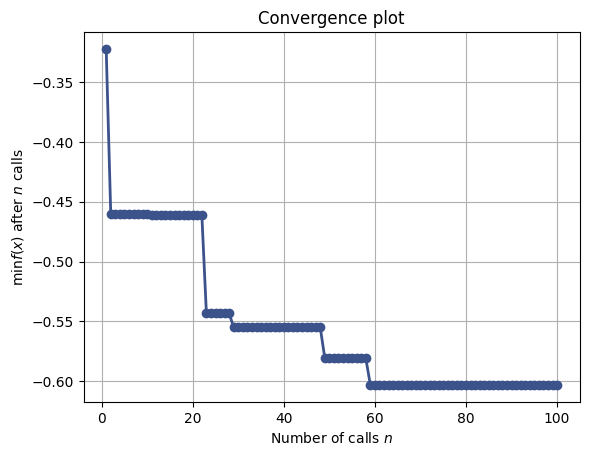

In [10]:
plot_convergence(res)
plt.show()

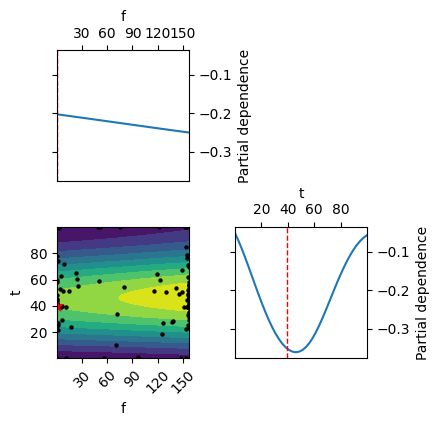

In [11]:
from skopt.plots import plot_convergence, plot_objective, plot_evaluations

fig = plot_objective(res, dimensions=['f', 't'])
plt.show()

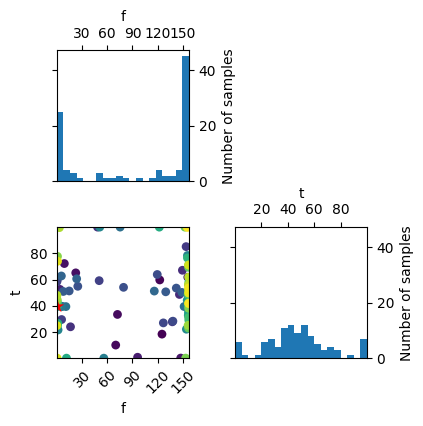

In [12]:
fig = plot_evaluations(res, dimensions=['f', 't'])
plt.show()

# ** Implenting pulse powered f(t)**

In [13]:
def f_t(t, args):
    """ Time-dependent driving amplitude.
        args contains 'on_time' when the pulse turns off.
    """
    on_time = args['on_time']
    f_max = args['f_max']
    return f_max if t < on_time else 0


In [19]:
def objective_general(f_max, on_time):
    wc = wa = 1.0  # Example values
    w0 = wc
    delta_c = wc - w0
    delta_a = wa - w0
    tau = wc * times  # Total time and steps for simulation

    # Time-dependent driving term
    H_drive = [0.5 * (sigma_plus + sigma_minus), lambda t, args: f_t(t, args)]
    H_static = delta_c * a.dag() * a + 0.5 * delta_a * sigma_z + g * (sigma_plus * a + sigma_minus * a.dag())
    H = [H_static, H_drive]

    result = mesolve(H, psi_den, tau, c_ops=[], e_ops=[], options={'nsteps': 1e9, 'atol': 1e-7, 'rtol': 1e-7}, args={'on_time': on_time, 'f_max': f_max})
    final_rho = result.states[-1]
    fid = fidelity(target_den, final_rho)
    return -fid  # Negative for minimization

In [20]:
def objective(x):
    return objective_general(x[0], x[1])

# Define the parameter space
space = [
    Real(0.0, 25.0 * 2 * np.pi, name='f_max'),  # Max amplitude of the pulse
    Real(0, 100, name='on_time')                # Time at which the pulse turns off
]

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=100, random_state=42, verbose=True, acq_func='EI')

# Print the best parameters found
print(f"Optimal f_max: {res.x[0]/(2 * np.pi):.2f} rad/s, Optimal on_time: {res.x[1]:.2f} s")


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 35.1480
Function value obtained: -0.7565
Current minimum: -0.7565
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 49.7218
Function value obtained: -0.0807
Current minimum: -0.7565
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 32.2028
Function value obtained: -0.9741
Current minimum: -0.9741
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 37.6049
Function value obtained: -0.3028
Current minimum: -0.9741
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 40.1722
Function value obtained: -0.1853
Current minimum: -0.9741
Iteration No: 6 star

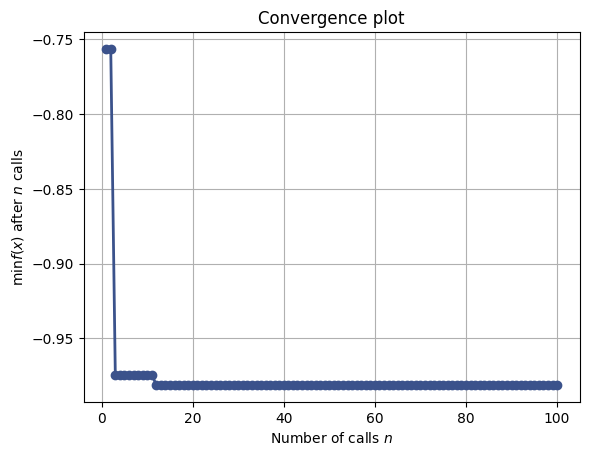

In [21]:
plot_convergence(res)
plt.show()

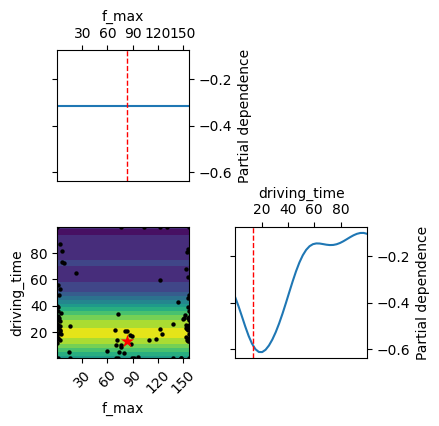

In [22]:

fig = plot_objective(res, dimensions=['f_max', 'driving_time'])
plt.show()

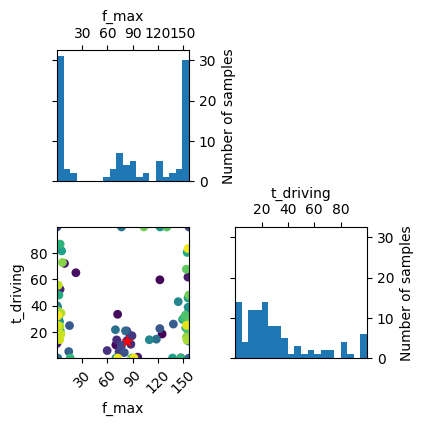

In [23]:
fig = plot_evaluations(res, dimensions=['f_max', 't_driving'])
plt.show()